# Sequential bootstrap

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

In [69]:
t1 = pd.to_datetime(pd.read_csv("../data/t1.csv", index_col=0, parse_dates=True, squeeze=True))

In [33]:
# t1 = t1[-30:]

In [34]:
def get_ind_matrix(bar_ix,t1):
    """Get Indicator matrix"""
    ind_m=(pd.DataFrame(0,index=bar_ix,columns=range(t1.shape[0])))
    for i,(t0,t1) in enumerate(t1.iteritems()):ind_m.loc[t0:t1,i]=1.
    return ind_m

def get_avg_uniqueness(ind_m):
    """Average uniqueness from indicator matrix"""
    c=ind_m.sum(axis=1) # concurrency
    u=ind_m.div(c,axis=0) # uniqueness
    avg_u=u[u>0].mean() # avg. uniqueness
    return avg_u

def seq_bootstrap(ind_m,s_length=None):
    """Generate a sample via sequential bootstrap"""
    if s_length is None:s_length=ind_m.shape[1]
    phi=[]
    while len(phi)<s_length:
        clear_output()
        print(f"len(phi) is {len(phi)} which is < than s_length {s_length}")
        avg_u=pd.Series(dtype=float)
        for i in ind_m:
            ind_m_=ind_m[phi+[i]] # reduce ind_m
            avg_u.loc[i]=get_avg_uniqueness(ind_m_).iloc[-1]
        prob=avg_u/avg_u.sum() # draw prob
        phi+=[np.random.choice(ind_m.columns,p=prob)]
    return phi

In [36]:
bar_ix=t1.index # index of bars
ind_m=get_ind_matrix(bar_ix,t1)
phi_random=np.random.choice(ind_m.columns,size=ind_m.shape[1])
phi_seq=seq_bootstrap(ind_m)
print(f'Standard uniqueness: {get_avg_uniqueness(ind_m[phi_random]).mean():.4f}')
print(f'Sequential uniqueness: {get_avg_uniqueness(ind_m[phi_seq]).mean():.4f}')

len(phi) is 29 which is < than sLength 30
Standard uniqueness: 0.2101
[26, 20, 3, 9, 17, 12, 8, 0, 13, 29, 27, 6, 7, 6, 12, 1, 17, 7, 5, 5, 19, 23, 2, 4, 5, 1, 9, 25, 23, 10]
Sequential uniqueness: 0.2111


In [46]:
seq = list(map(lambda x: t1.index[x], phi_seq))

In [48]:
new_t1 = t1.reindex(seq)

In [51]:
new_t1.head(), len(new_t1), len(t1)

(2021-06-18 10:02:30.206   2021-06-19 10:02:31.439
 2021-06-17 12:16:57.680   2021-06-18 12:17:00.195
 2021-06-13 08:32:19.060   2021-06-14 08:32:30.869
 2021-06-14 18:34:18.156   2021-06-15 18:34:22.956
 2021-06-16 11:41:26.128   2021-06-17 11:41:31.660
 Name: time, dtype: datetime64[ns],
 30,
 30)

In [56]:
new_t1.to_csv("../data/seq_bootstrap.csv")

In [67]:
# new_t1 = pd.to_datetime(pd.read_csv("../data/seq_bootstrap.csv", index_col=0, parse_dates=True, squeeze=True))

## Plotting

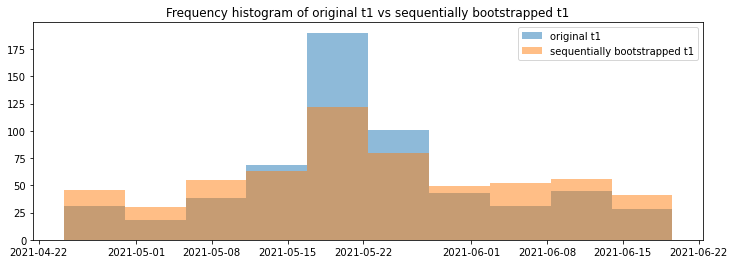

In [78]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(t1, alpha=.5, label="original t1")
ax.hist(new_t1, alpha=.5, label="sequentially bootstrapped t1")
ax.set_title("Frequency histogram of original t1 vs sequentially bootstrapped t1")
ax.legend();
